In [2]:
from datasets import Dataset1, Dataset2
from presets import SegmentationPresetTrain, SegmentationPresetEval
from matplotlib.pyplot import imshow
import numpy as np

In [3]:
ds1 = Dataset1("../BIO_data/DB_UoA", transform=SegmentationPresetTrain(520, 480))

In [6]:
print(len(ds1))
imshow(np.asarray(ds1[0][1][2]))
ds1[0]

200


TypeError: __call__() missing 1 required positional argument: 'target'

27


(<PIL.Image.Image image mode=RGB size=4288x2848 at 0x7F1EF68CCB20>,
 (<PIL.Image.Image image mode=P size=4288x2848 at 0x7F1EF68CCA90>,
  <PIL.Image.Image image mode=P size=4288x2848 at 0x7F1EF68CCC40>,
  <PIL.Image.Image image mode=P size=4288x2848 at 0x7F1EF68CCCD0>,
  <PIL.Image.Image image mode=P size=4288x2848 at 0x7F1EF68CCDC0>,
  <PIL.Image.Image image mode=P size=4288x2848 at 0x7F1EF68CCC70>))

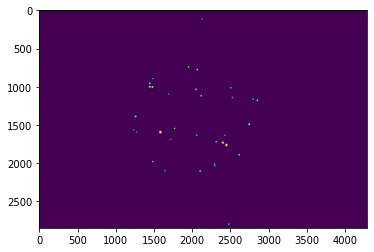

In [5]:
ds2 = Dataset2("../BIO_data/Database", image_set='test')
print(len(ds2))
imshow(np.asarray(ds2[0][1][0]))
ds2[0]

In [30]:
import os

root = "../BIO_data/DB_UoA"


objs = list(filter(os.path.isdir, [os.path.join(root, d) for d in os.listdir(root)]))
objs.sort()
images = []
targets = []
target_type = ("idk", "idk2", "idk3")


for obj in objs:
    files = [os.path.join(obj, f) for f in os.listdir(obj)]
    files.sort()
    images.append(files[-1])
    targets.append(files[:-1])

In [5]:
import os

root = "../BIO_data/Database"

split = "test"

dataset_path = {
    "train" : "a. Training Set",
    "test" : "b. Testing Set"
}

if split not in dataset_path:
    assert "err"


images = os.listdir(os.path.join(root, "A. Segmentation", "1. Original Images", dataset_path[split] ) )
images = [ os.path.join(root, "A. Segmentation", "1. Original Images", dataset_path[split], f) for f in images]
images.sort()

targets = {
    "1. Microaneurysms" : None,
    "2. Haemorrhages"   : None,
    "3. Hard Exudates"  : None,
    "4. Soft Exudates"  : None,
    "5. Optic Disc"     : None,
}

for t in targets:
    targets[t] = os.listdir( os.path.join(root , "A. Segmentation" , "2. All Segmentation Groundtruths" , dataset_path[split] , t) )
    targets[t] = [ os.path.join(root , "A. Segmentation" , "2. All Segmentation Groundtruths" , dataset_path[split] , t, f) for f in targets[t]]
    targets[t].sort()

In [6]:
for i in targets:
    print (targets[i][:1])

['../BIO_data/Database/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/1. Microaneurysms/IDRiD_55_MA.tif']
['../BIO_data/Database/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/2. Haemorrhages/IDRiD_55_HE.tif']
['../BIO_data/Database/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/3. Hard Exudates/IDRiD_55_EX.tif']
['../BIO_data/Database/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/4. Soft Exudates/IDRiD_55_SE.tif']
['../BIO_data/Database/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/5. Optic Disc/IDRiD_55_OD.tif']
